In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_excel('/content/drive/MyDrive/AI4LS_Data/LUCAS-SOIL-2018.xls')


In [4]:
#First filter the points only for Sweden
#df = df[df['NUTS_0']=='SE']
df.shape

(18984, 27)

In [5]:
df.describe()

,POINTID,pH_CaCl2,pH_H2O,EC,CaCO3 (20-30 cm),Ox_Al,Ox_Fe,TH_LAT,TH_LONG,Elev
count,1.898400e+04,18983.000000,18983.000000,18975.000000,14.000000,2510.000000,2510.000000,18984.000000,18984.000000,18984.000000
mean,4.277080e+07,5.706379,6.259454,18.389964,288.857143,1.171474,2.547171,48.689184,10.330166,613.188211
std,8.350827e+06,1.398597,1.319466,25.560630,236.021139,1.243111,2.431786,7.779195,11.192492,1461.681637
min,2.652197e+07,2.600000,3.340000,0.240000,1.000000,0.000000,0.100000,34.690270,-10.149099,-55.000000
25%,3.492293e+07,4.500000,5.120000,8.095000,64.500000,0.600000,1.000000,42.229369,-0.745365,124.000000
50%,4.466391e+07,5.800000,6.290000,13.950000,287.500000,0.900000,1.900000,47.338688,12.078146,261.000000
75%,4.992278e+07,7.100000,7.500000,20.600000,417.750000,1.300000,3.300000,53.424240,20.647825,666.250000
max,6.498167e+07,9.800000,10.430000,1295.600000,702.000000,34.700000,35.800000,69.956515,34.029660,11464.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18984 entries, 0 to 18983
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Depth             18984 non-null  object 
 1   POINTID           18984 non-null  int64  
 2   pH_CaCl2          18983 non-null  float64
 3   pH_H2O            18983 non-null  float64
 4   EC                18975 non-null  float64
 5   OC                18983 non-null  object 
 6   CaCO3             11221 non-null  object 
 7   P                 18958 non-null  object 
 8   N                 18983 non-null  object 
 9   K                 18983 non-null  object 
 10  OC (20-30 cm)     141 non-null    object 
 11  CaCO3 (20-30 cm)  14 non-null     float64
 12  Ox_Al             2510 non-null   float64
 13  Ox_Fe             2510 non-null   float64
 14  NUTS_0            18984 non-null  object 
 15  NUTS_1            18984 non-null  object 
 16  NUTS_2            18984 non-null  object

In [7]:
for column in df.columns:
    print(f"Unique values in {column}: {df[column].nunique()}")


Unique values in Depth: 4
Unique values in POINTID: 18984
Unique values in pH_CaCl2: 80
Unique values in pH_H2O: 557
Unique values in EC: 3991
Unique values in OC: 2539
Unique values in CaCO3: 809
Unique values in P: 1483
Unique values in N: 394
Unique values in K: 5633
Unique values in OC (20-30 cm): 119
Unique values in CaCO3 (20-30 cm): 14
Unique values in Ox_Al: 75
Unique values in Ox_Fe: 128
Unique values in NUTS_0: 28
Unique values in NUTS_1: 99
Unique values in NUTS_2: 260
Unique values in NUTS_3: 1035
Unique values in TH_LAT: 18845
Unique values in TH_LONG: 18984
Unique values in SURVEY_DATE: 260
Unique values in Elev: 1839
Unique values in LC: 65
Unique values in LU: 26
Unique values in LC0_Desc: 8
Unique values in LC1_Desc: 65
Unique values in LU1_Desc: 26


In [8]:
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-8-f471181e404f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,POINTID,pH_CaCl2,pH_H2O,EC,CaCO3 (20-30 cm),Ox_Al,Ox_Fe,TH_LAT,TH_LONG,Elev
POINTID,1.000000,-0.227756,-0.219786,-0.098808,-0.192683,0.062258,0.113065,0.447964,0.987241,0.007913
pH_CaCl2,-0.227756,1.000000,0.986954,0.217413,0.324135,-0.246886,-0.309646,-0.592064,-0.272420,-0.008990
pH_H2O,-0.219786,0.986954,1.000000,0.172125,0.335215,-0.253661,-0.338538,-0.588712,-0.261765,-0.005550
EC,-0.098808,0.217413,0.172125,1.000000,-0.046696,-0.031823,-0.007328,-0.126129,-0.111926,0.000132
CaCO3 (20-30 cm),-0.192683,0.324135,0.335215,-0.046696,1.000000,-0.199406,0.120731,-0.386181,0.044096,-0.233228
Ox_Al,0.062258,-0.246886,-0.253661,-0.031823,-0.199406,1.000000,0.515174,0.124222,0.063568,-0.009195
Ox_Fe,0.113065,-0.309646,-0.338538,-0.007328,0.120731,0.515174,1.000000,0.321234,0.106355,-0.008714
TH_LAT,0.447964,-0.592064,-0.588712,-0.126129,-0.386181,0.124222,0.321234,1.000000,0.520398,-0.044204
TH_LONG,0.987241,-0.272420,-0.261765,-0.111926,0.044096,0.063568,0.106355,0.520398,1.000000,0.013702
Elev,0.007913,-0.008990,-0.005550,0.000132,-0.233228,-0.009195,-0.008714,-0.044204,0.013702,1.000000


<Axes: >

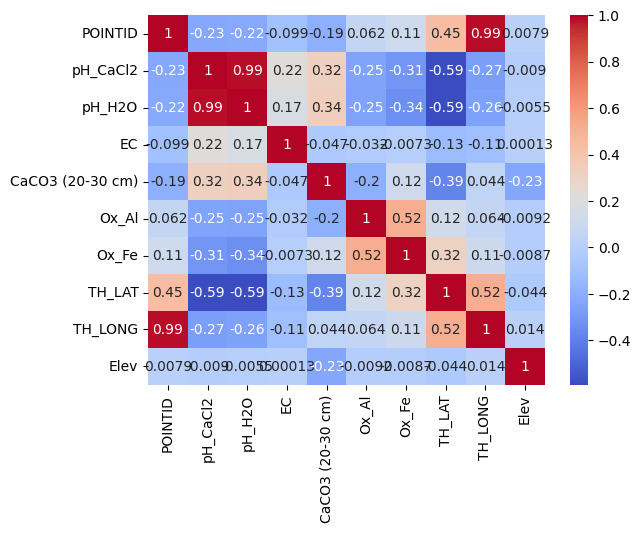

In [9]:
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [10]:
for col in ['P', 'N', 'K']:
    df.loc[df[col]=='< LOD', col] = np.nan
    df.loc[df[col]=='<0.0', col] = np.nan
    df[col]=df[col].astype(float)
for col in ['OC','CaCO3','OC (20-30 cm)','CaCO3 (20-30 cm)']:
    df.loc[df[col]=='< LOD', col] = np.nan
    df.loc[df[col]=='<  LOD', col] = np.nan
    df.loc[df[col]=='<0.0', col] = np.nan
    df[col]=df[col].astype(float)

for col in ['NUTS_0','NUTS_1','NUTS_2','NUTS_3','LC','LU','LC0_Desc','LC1_Desc','LU1_Desc']:
    df[col]=df[col].astype('category')

df.dtypes



cols = df.columns
for c in cols:
    if df[c].dtype == 'object':
        df[c] = df[c].str.strip()

df.dtypes

Depth                 object
POINTID                int64
pH_CaCl2             float64
pH_H2O               float64
EC                   float64
OC                   float64
CaCO3                float64
P                    float64
N                    float64
K                    float64
OC (20-30 cm)        float64
CaCO3 (20-30 cm)     float64
Ox_Al                float64
Ox_Fe                float64
NUTS_0              category
NUTS_1              category
NUTS_2              category
NUTS_3              category
TH_LAT               float64
TH_LONG              float64
SURVEY_DATE           object
Elev                   int64
LC                  category
LU                  category
LC0_Desc            category
LC1_Desc            category
LU1_Desc            category
dtype: object

In [11]:
df.head(2)

,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3.0,NaN,1.1,101.9,...,AT113,47.150238,16.134212,06/07/18,291,C23,U120,Woodland,Other coniferous woodland,Forestry
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1.0,NaN,1.3,51.2,...,AT113,47.274272,16.175359,06/07/18,373,C21,U120,Woodland,Spruce dominated coniferous woodland,Forestry


In [12]:
df['SURVEY_DATE']=pd.to_datetime(df['SURVEY_DATE'], format='%d/%m/%y')
df.head()

,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3.0,NaN,1.1,101.9,...,AT113,47.150238,16.134212,2018-07-06,291,C23,U120,Woodland,Other coniferous woodland,Forestry
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1.0,NaN,1.3,51.2,...,AT113,47.274272,16.175359,2018-07-06,373,C21,U120,Woodland,Spruce dominated coniferous woodland,Forestry
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1.0,12.3,3.1,114.8,...,AT113,47.123260,16.289693,2018-06-02,246,C33,U120,Woodland,Other mixed woodland,Forestry
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3.0,NaN,2.0,165.8,...,AT113,47.245693,16.357506,2018-07-06,305,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2.0,NaN,2.2,42.1,...,AT113,47.296372,16.416782,2018-07-05,335,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry


In [13]:
df.head(20)

,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3.0,NaN,1.1,101.9,...,AT113,47.150238,16.134212,2018-07-06,291,C23,U120,Woodland,Other coniferous woodland,Forestry
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1.0,NaN,1.3,51.2,...,AT113,47.274272,16.175359,2018-07-06,373,C21,U120,Woodland,Spruce dominated coniferous woodland,Forestry
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1.0,12.3,3.1,114.8,...,AT113,47.123260,16.289693,2018-06-02,246,C33,U120,Woodland,Other mixed woodland,Forestry
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3.0,NaN,2.0,165.8,...,AT113,47.245693,16.357506,2018-07-06,305,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2.0,NaN,2.2,42.1,...,AT113,47.296372,16.416782,2018-07-05,335,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry
5,0-20 cm,48122730,6.3,6.81,14.46,18.0,NaN,68.0,2.0,277.2,...,AT111,47.488817,16.520595,2018-06-18,232,B18,U111,Cropland,Triticale,Agriculture (excluding fallow land and kitchen...
6,0-20 cm,48202738,5.8,6.37,17.08,12.5,NaN,58.1,1.4,315.5,...,AT111,47.554102,16.635559,2018-06-18,283,B32,U111,Cropland,Rape and turnip rape,Agriculture (excluding fallow land and kitchen...
7,0-20 cm,48222780,7.1,7.98,23.55,22.9,96.0,17.5,2.1,329.1,...,AT112,47.928696,16.711158,2018-05-21,136,B82,U111,Cropland,Vineyards,Agriculture (excluding fallow land and kitchen...
8,0-20 cm,48342774,7.4,8.09,22.61,29.1,86.0,62.2,2.9,367.8,...,AT112,47.865059,16.863852,2018-06-26,115,B32,U111,Cropland,Rape and turnip rape,Agriculture (excluding fallow land and kitchen...
9,0-20 cm,48442784,7.2,7.84,14.94,14.4,3.0,NaN,1.6,146.2,...,AT112,47.946158,17.009260,2018-06-11,166,B14,U111,Cropland,Rye,Agriculture (excluding fallow land and kitchen...


In [14]:
cols = df.columns.tolist()
for index, c in enumerate(cols):
    cols[index] = c.replace(' ', '_')
df.columns = cols
df.columns

Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N',
       'K', 'OC_(20-30_cm)', 'CaCO3_(20-30_cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_0',
       'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'SURVEY_DATE',
       'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc'],
      dtype='object')

In [15]:
df.dtypes

Depth                       object
POINTID                      int64
pH_CaCl2                   float64
pH_H2O                     float64
EC                         float64
OC                         float64
CaCO3                      float64
P                          float64
N                          float64
K                          float64
OC_(20-30_cm)              float64
CaCO3_(20-30_cm)           float64
Ox_Al                      float64
Ox_Fe                      float64
NUTS_0                    category
NUTS_1                    category
NUTS_2                    category
NUTS_3                    category
TH_LAT                     float64
TH_LONG                    float64
SURVEY_DATE         datetime64[ns]
Elev                         int64
LC                        category
LU                        category
LC0_Desc                  category
LC1_Desc                  category
LU1_Desc                  category
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named df
df_encoded = df.copy()  # Create a copy to avoid modifying the original DataFrame

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through columns and apply label encoding
for column in df_encoded.columns:
    if df_encoded[column].dtype.name == 'category':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Display the resulting DataFrame
df_encoded.head()



,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3.0,NaN,1.1,101.9,...,2,47.150238,16.134212,2018-07-06,291,47,3,7,32,12
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1.0,NaN,1.3,51.2,...,2,47.274272,16.175359,2018-07-06,373,45,3,7,55,12
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1.0,12.3,3.1,114.8,...,2,47.123260,16.289693,2018-06-02,246,50,3,7,36,12
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3.0,NaN,2.0,165.8,...,2,47.245693,16.357506,2018-07-06,305,46,3,7,42,12
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2.0,NaN,2.2,42.1,...,2,47.296372,16.416782,2018-07-05,335,46,3,7,42,12


In [17]:
df_encoded.dtypes

Depth                       object
POINTID                      int64
pH_CaCl2                   float64
pH_H2O                     float64
EC                         float64
OC                         float64
CaCO3                      float64
P                          float64
N                          float64
K                          float64
OC_(20-30_cm)              float64
CaCO3_(20-30_cm)           float64
Ox_Al                      float64
Ox_Fe                      float64
NUTS_0                       int64
NUTS_1                       int64
NUTS_2                       int64
NUTS_3                       int64
TH_LAT                     float64
TH_LONG                    float64
SURVEY_DATE         datetime64[ns]
Elev                         int64
LC                           int64
LU                           int64
LC0_Desc                     int64
LC1_Desc                     int64
LU1_Desc                     int64
dtype: object

In [18]:
# List of columns to drop
columns_to_drop = ['OC_(20-30_cm)', 'CaCO3_(20-30_cm)', 'Ox_Al', 'Ox_Fe']

# Dropping the specified columns
df_encoded = df_encoded.drop(columns=columns_to_drop)
df_encoded.head()

,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3.0,NaN,1.1,101.9,...,2,47.150238,16.134212,2018-07-06,291,47,3,7,32,12
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1.0,NaN,1.3,51.2,...,2,47.274272,16.175359,2018-07-06,373,45,3,7,55,12
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1.0,12.3,3.1,114.8,...,2,47.123260,16.289693,2018-06-02,246,50,3,7,36,12
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3.0,NaN,2.0,165.8,...,2,47.245693,16.357506,2018-07-06,305,46,3,7,42,12
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2.0,NaN,2.2,42.1,...,2,47.296372,16.416782,2018-07-05,335,46,3,7,42,12


In [19]:
import numpy as np

# Assuming df_encoded is your DataFrame
# Replace NaN values with 0 in the 'P' column
df_encoded['P'] = df_encoded['P'].replace(np.nan, 0).astype(float)

# Display the first 30 rows to verify the changes
df_encoded.head(10)


,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3.0,0.0,1.1,101.9,...,2,47.150238,16.134212,2018-07-06,291,47,3,7,32,12
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1.0,0.0,1.3,51.2,...,2,47.274272,16.175359,2018-07-06,373,45,3,7,55,12
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1.0,12.3,3.1,114.8,...,2,47.123260,16.289693,2018-06-02,246,50,3,7,36,12
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3.0,0.0,2.0,165.8,...,2,47.245693,16.357506,2018-07-06,305,46,3,7,42,12
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2.0,0.0,2.2,42.1,...,2,47.296372,16.416782,2018-07-05,335,46,3,7,42,12
5,0-20 cm,48122730,6.3,6.81,14.46,18.0,NaN,68.0,2.0,277.2,...,0,47.488817,16.520595,2018-06-18,232,10,0,2,63,3
6,0-20 cm,48202738,5.8,6.37,17.08,12.5,NaN,58.1,1.4,315.5,...,0,47.554102,16.635559,2018-06-18,283,16,0,2,45,3
7,0-20 cm,48222780,7.1,7.98,23.55,22.9,96.0,17.5,2.1,329.1,...,1,47.928696,16.711158,2018-05-21,136,40,0,2,64,3
8,0-20 cm,48342774,7.4,8.09,22.61,29.1,86.0,62.2,2.9,367.8,...,1,47.865059,16.863852,2018-06-26,115,16,0,2,45,3
9,0-20 cm,48442784,7.2,7.84,14.94,14.4,3.0,0.0,1.6,146.2,...,1,47.946158,17.009260,2018-06-11,166,6,0,2,48,3


In [20]:
df_encoded['CaCO3'] = df_encoded['CaCO3'].replace(np.nan, 0).astype(float)
df_encoded.head()

,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3.0,0.0,1.1,101.9,...,2,47.150238,16.134212,2018-07-06,291,47,3,7,32,12
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1.0,0.0,1.3,51.2,...,2,47.274272,16.175359,2018-07-06,373,45,3,7,55,12
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1.0,12.3,3.1,114.8,...,2,47.123260,16.289693,2018-06-02,246,50,3,7,36,12
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3.0,0.0,2.0,165.8,...,2,47.245693,16.357506,2018-07-06,305,46,3,7,42,12
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2.0,0.0,2.2,42.1,...,2,47.296372,16.416782,2018-07-05,335,46,3,7,42,12


In [21]:
df_encoded.columns

Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N',
       'K', 'NUTS_0', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG',
       'SURVEY_DATE', 'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc'],
      dtype='object')

In [22]:
df_encoded['LU1_Desc']

0        12
1        12
2        12
3        12
4        12
         ..
18979     3
18980     3
18981     3
18982    20
18983     3
Name: LU1_Desc, Length: 18984, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Selecting features and target variable
features = ['pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K', 'NUTS_0', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'Elev', 'LC', 'LU']
target = 'LU1_Desc'

X = df_encoded[features]
y = df_encoded[target]

# Identifying missing classes
#missing_classes = set(range(64)) - set(y.unique())
#print("Missing classes:", missing_classes)

# Replacing them with dummy values if missing_classes is not empty
if missing_classes:
    y = y.replace(missing_classes.pop(), -1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

# Initializing XGBoost classifier
model = XGBClassifier()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_report(y_test, predictions))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00      1301
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00        88
          12       1.00      1.00      1.00       673
          13       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00        16
          17       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1
          20       1.00      1.00      1.00        10
          21       1.00      1.00      1.0

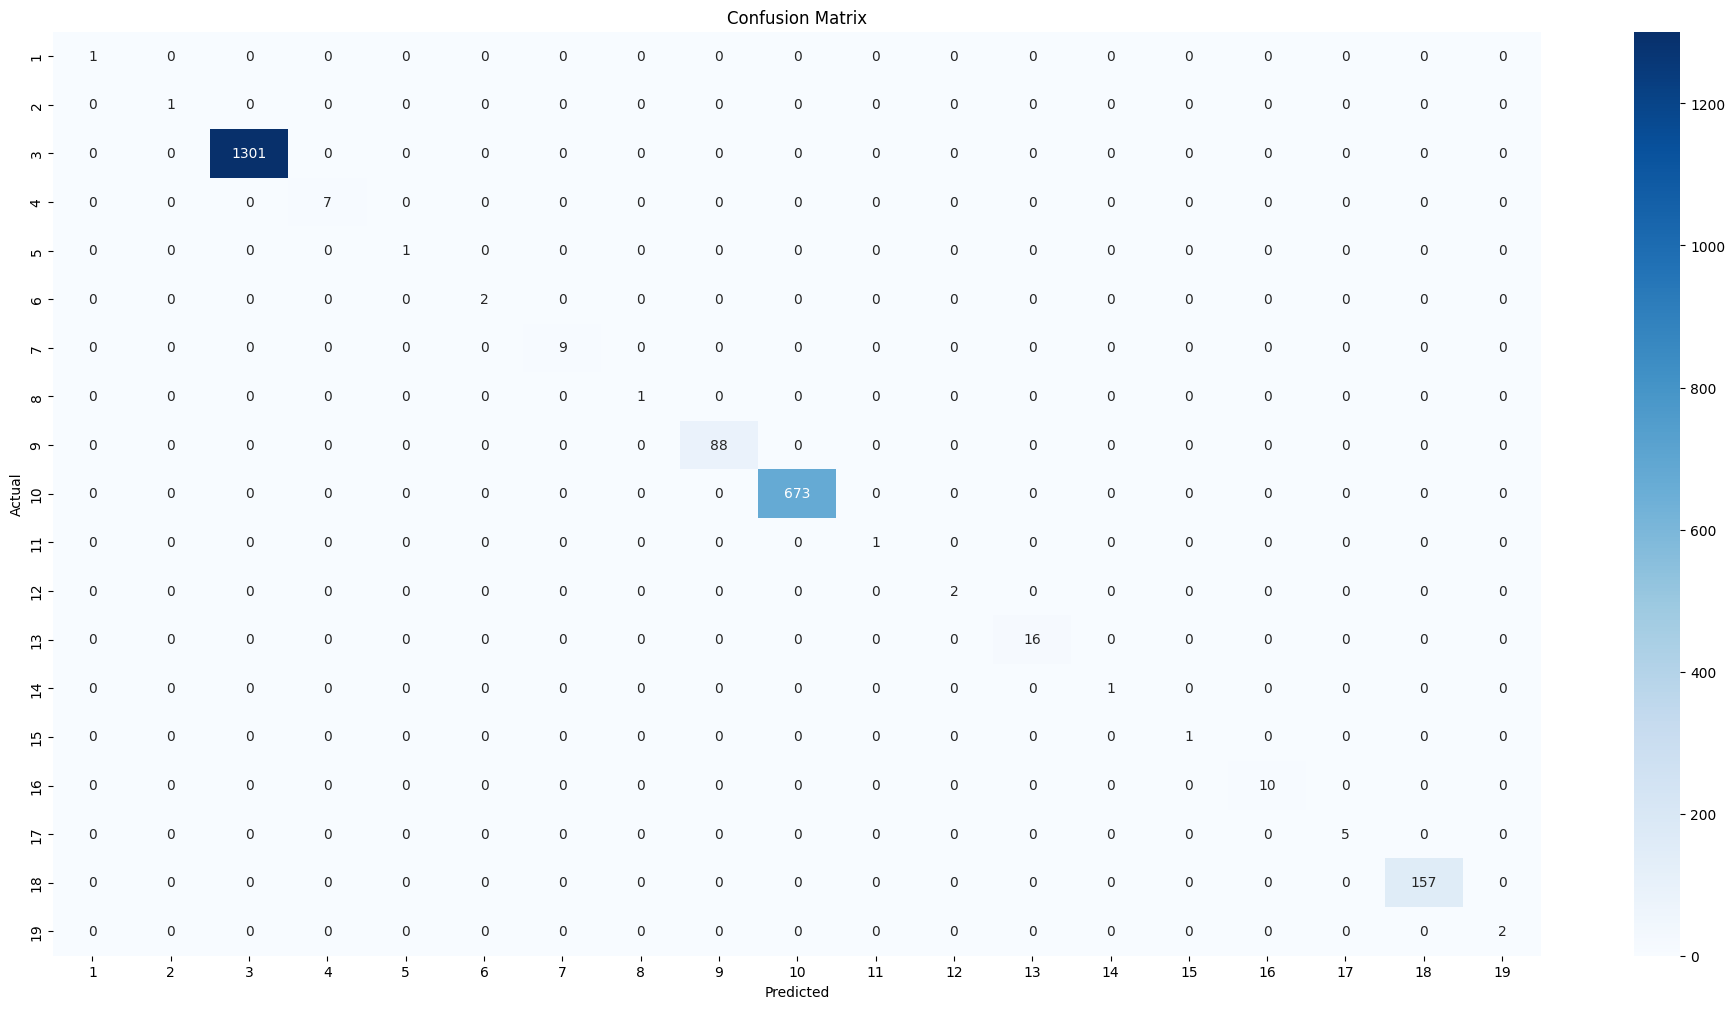

In [33]:

from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=range(1, cm.shape[0]+1), columns=range(1, cm.shape[1]+1))

# Plot the heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


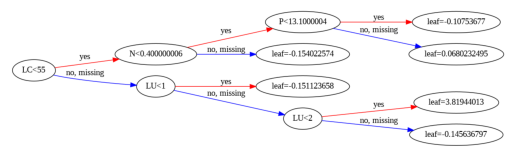

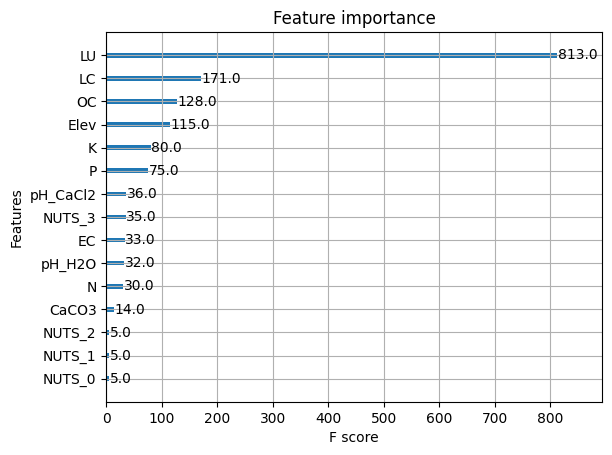

In [34]:
# Visualize a specific tree (e.g., the first tree)
from xgboost import plot_tree, plot_importance
plot_tree(model, num_trees=10, rankdir='LR')  # You can change num_trees to visualize a different tree
plt.show()

# Visualize feature importance
plot_importance(model)
plt.show()

In [35]:
#saving the built model
model.save_model('LU1_desc_prediction.model')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:57:40] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [36]:
from google.colab import files

# Replace 'your_model_filename.model' with the actual filename
files.download('LU1_desc_prediction.model')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>